*Import library*

In [43]:
# Load dataset
import pandas as pd
import numpy as np

# Standarisasi dan Normalisasi
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Imbalanced dataset
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Label encoding dan one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Feature selection
from sklearn.tree import DecisionTreeRegressor

# Split training testing dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

# Feature selection dan Visualisai data
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

*Load dataset*

In [44]:
# Memuat dataset menggunakan pandas
data = pd.read_csv('dataset1016-DM.csv')

# Menampilkan dataset yang di load
data.head()

,WCTA,EBITA,RETA,BVETD,Z-Score,Class
0,4.32,1.400,1.36,13.26,0.7762,Distress Zone
1,0.95,1.750,1.09,195.14,5.9081,Safe Zone
2,3.19,1.610,0.35,20.62,0.0852,Distress Zone
3,1.80,1.500,NaN,31.43,5.7425,Safe Zone
4,3.59,1.625,0.61,27.68,2.1127,Grey Zone


*Cek missing value sebelum preprocessing*

In [45]:
print("Jumlah missing value sebelum preprocessing:")
print(data.isnull().sum())

Jumlah missing value sebelum preprocessing:
WCTA       0
EBITA      0
RETA       2
BVETD      0
Z-Score    0
Class      0
dtype: int64


*Handling missing value*

In [46]:
# Menangani missing value
data.fillna(data.mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7780\2906592572.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


*Cek missing value setelah preprocessing*

In [47]:
print("Jumlah missing value setelah preprocessing:")
print(data.isnull().sum())

Jumlah missing value setelah preprocessing:
WCTA       0
EBITA      0
RETA       0
BVETD      0
Z-Score    0
Class      0
dtype: int64


*Standarisasi*

In [48]:
# Pisahkan features dan kolom target
X = data.iloc[:, :-2]
y = data.iloc[:, :-1]

# Membuat objek StandardScaler
scaler = StandardScaler()

# Skala fitur
scaled_X = scaler.fit_transform(X)

# Melakukan standarisasi data
scaled_data = pd.DataFrame(scaled_X, columns=X.columns)

# Definisikan variable y adalah target
scaled_data = y

# Menampilkan hasil
print(scaled_data.head())

   WCTA  EBITA      RETA   BVETD  Z-Score
0  4.32  1.400  1.360000   13.26   0.7762
1  0.95  1.750  1.090000  195.14   5.9081
2  3.19  1.610  0.350000   20.62   0.0852
3  1.80  1.500  0.838088   31.43   5.7425
4  3.59  1.625  0.610000   27.68   2.1127


*Normalisasi*

In [49]:
# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Melakukan normalisasi data
normalized_data = min_max_scaler.fit_transform(data.iloc[:, [0, 1, 2, 3]])

# Menampilkan hasil
print(normalized_data)

[[0.24120603 0.2        0.62916112 0.01441422]
 [0.05304299 0.375      0.61118509 1.        ]
 [0.17811279 0.305      0.56191744 0.05429717]
 [0.10050251 0.25       0.59441333 0.11287526]
 [0.20044668 0.3125     0.5792277  0.09255446]
 [0.19653825 0.175      0.59441333 0.        ]
 [0.19653825 0.4375     0.66511318 0.01376395]
 [0.         0.6        0.3701731  0.23956866]
 [0.21217197 0.3        0.58788282 0.00493118]
 [0.06700168 0.55       0.60785619 0.35650807]
 [0.1451703  0.15       0.63981358 0.00764062]
 [0.13567839 0.345      1.         0.18749323]
 [0.1546622  0.275      0.55193076 0.02243416]
 [0.07593523 0.3        0.62050599 0.10669773]
 [0.20212172 0.15       0.62450067 0.05456812]
 [0.13512004 0.675      0.66844208 0.02151295]
 [0.16917923 0.4125     0.64380826 0.007749  ]
 [0.04913456 0.475      0.6551265  0.27842202]
 [0.09715243 0.3        0.57323569 0.02541454]
 [0.01116695 0.45       0.59853529 0.19128644]
 [0.11669458 0.35       0.64114514 0.00525631]
 [0.17811279 

*Label encoding*

In [50]:
# Terapkan label encoding
le = LabelEncoder()
data['le'] = le.fit_transform(data['Z-Score'])
data['Class'] = le.fit_transform(data['Class'])

# Menampilkan hasil
print(data.head())

   WCTA  EBITA      RETA   BVETD  Z-Score  Class  le
0  4.32  1.400  1.360000   13.26   0.7762      0  30
1  0.95  1.750  1.090000  195.14   5.9081      2  67
2  3.19  1.610  0.350000   20.62   0.0852      0   6
3  1.80  1.500  0.838088   31.43   5.7425      2  66
4  3.59  1.625  0.610000   27.68   2.1127      1  61


*One hot encoding*

In [51]:
# Terapkan one hot encoding pada kolom 'Class'
ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(data[['Class']]).toarray())

# Menampilkan hasil
print(data.head())

   WCTA  EBITA      RETA   BVETD  Z-Score  Class  le
0  4.32  1.400  1.360000   13.26   0.7762      0  30
1  0.95  1.750  1.090000  195.14   5.9081      2  67
2  3.19  1.610  0.350000   20.62   0.0852      0   6
3  1.80  1.500  0.838088   31.43   5.7425      2  66
4  3.59  1.625  0.610000   27.68   2.1127      1  61


*Split dataset*

In [52]:
# Pisahkan feature dan kolom target
X = data.iloc[:, :-2]
y = data.iloc[:, :-1]

# Membagi data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (56, 5)
Testing set shape:  (14, 5)


*Imbalanced dataset*

In [53]:
# Pisahkan features dan kolom target
X = data[['WCTA', 'EBITA', 'RETA', 'BVETD', 'Z-Score']]
y = data['Class']

# Membagi dataset menjadi set data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan oversampling pada data training
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Membuat klasifikasi decision tree
model = DecisionTreeClassifier()

# Melatih model pada data training yang sudah di oversampling
model.fit(X_train_res, y_train_res)

# Mengevaluasi kinerja model pada data testing
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.00      0.00      0.00         0

    accuracy                           0.93        14
   macro avg       0.67      0.62      0.64        14
weighted avg       1.00      0.93      0.96        14



c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Feature selection*

In [54]:
# Membuat model decision tree
model = DecisionTreeRegressor()

# Melatih model pada data training
model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = model.feature_importances_

# menampilkan feature importances
for i, col in enumerate(X.columns):
    print(col, ": ", importances[i])

# Mengevaluasi kinerja model pada set data uji
score = model.score(X_test, y_test)

# Menampilkan model score
print("Model score: ", score)

WCTA :  0.0
EBITA :  0.0
RETA :  0.0
BVETD :  0.0
Z-Score :  1.0
Model score:  0.7142857142857143


*Decision Tree*

In [55]:
# Pisahkan features dan kolom target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Ubah ukuran label agar sesuai dengan larik data
y = y[:X.shape[0]]

# Membuat objek decision tree
dtc = DecisionTreeClassifier()

# Fit the classifier to the data using the fit() method
dtc.fit(X, y)

DecisionTreeClassifier()

*Visualisasi data*

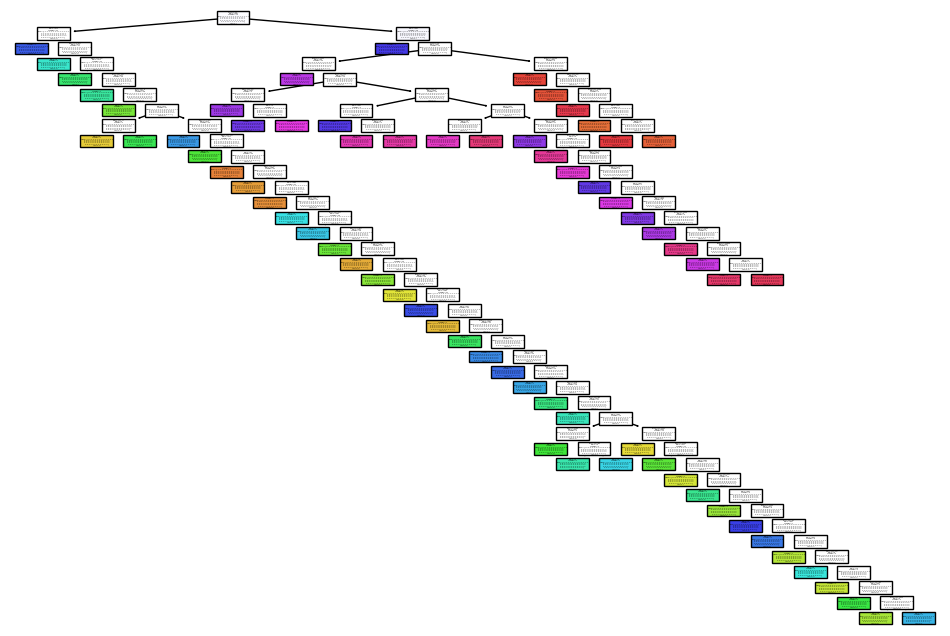

In [60]:
# Visualize the decision tree using the plot_tree() function
plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=X.columns, class_names=y.astype(str).unique(), filled=True)
plt.show()


In [61]:
RANDOM_SEED = 0
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test) 

(0.08163265306122448, 0.047619047619047616)